# Bike Sharing Assignment

### Problem Statement

A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It aspires to understand the demand for shared bikes among the people after Covid-19. They want to understand the factors affecting the demand for these shared bikes in the American market. 

Essentially, The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Therefore interpretation is important!

#### Solution
- Data understanding and exploration
- Data Visualisation
- Data preparation
- Model building and evaluation

### Data Understanding and exploration

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Importing day.csv
df = pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no null values to impute

In [9]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.
df['season']=df[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [10]:
# Assigning string values to different months instead of numeric values.
df['mnth']=df[['mnth']].apply(lambda x: x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}))

In [11]:
# Replacing weathersit column into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

df['weathersit']=df[['weathersit']].apply(lambda x: x.map({1:'clear', 2:'mist', 3:'light_snow_rain', 4:'heavy_rain'}))

In [12]:
# Assigning string values to weekdays instead of numeric values.
df['weekday']=df[['weekday']].apply(lambda x: x.map({1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday',6:'saturday',0:'sunday'}))

In [13]:
# Converting date to datetime format
# df['dteday']=df['dteday'].astype('datetime64')

In [14]:
# dropping the instant column which is just the record index and dteday which is redundant
df.drop(['instant','dteday'], axis = 1, inplace = True)

In [15]:
# All categorical variables in the dataset
categorical_df=df.select_dtypes(exclude=['float64','datetime64','int64'])
categorical_vars = categorical_df.columns
categorical_vars

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [16]:
# finding numerical variables, dropping yr, holiday and workingday as it falls under categorical variables
numerical_df = df.select_dtypes(exclude=['object'])
numerical_vars = numerical_df.drop(['holiday', 'workingday','yr'],axis=1).columns
numerical_vars

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

### Data Visualization


Let's spend some time in the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We will visualise our data using `matplotlib` and `seaborn`.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df.shape

(730, 14)

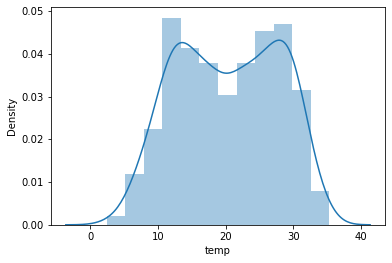

In [19]:
# temperature
sns.distplot(df['temp'])
plt.show()

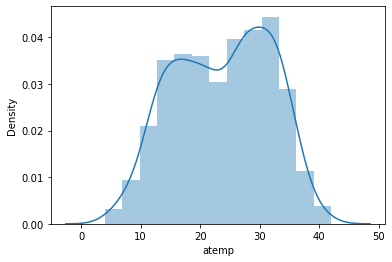

In [20]:
# actual temperature
sns.distplot(df['atemp'])
plt.show()

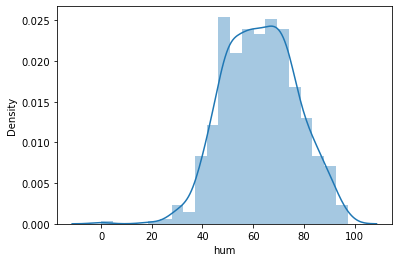

In [21]:
# humidity
sns.distplot(df['hum'])
plt.show()

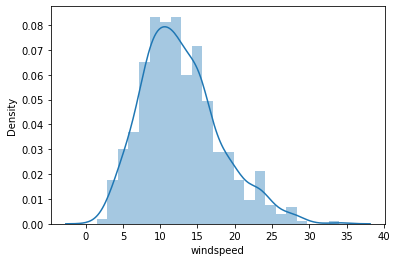

In [22]:
#wind speed
sns.distplot(df['windspeed'])
plt.show()

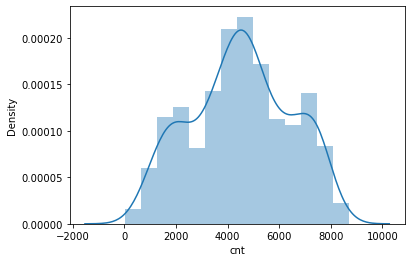

In [23]:
# target variable- cnt which is the sum of casual and registered
sns.distplot(df['cnt'])
plt.show()

### Visualizing Categorical Variables

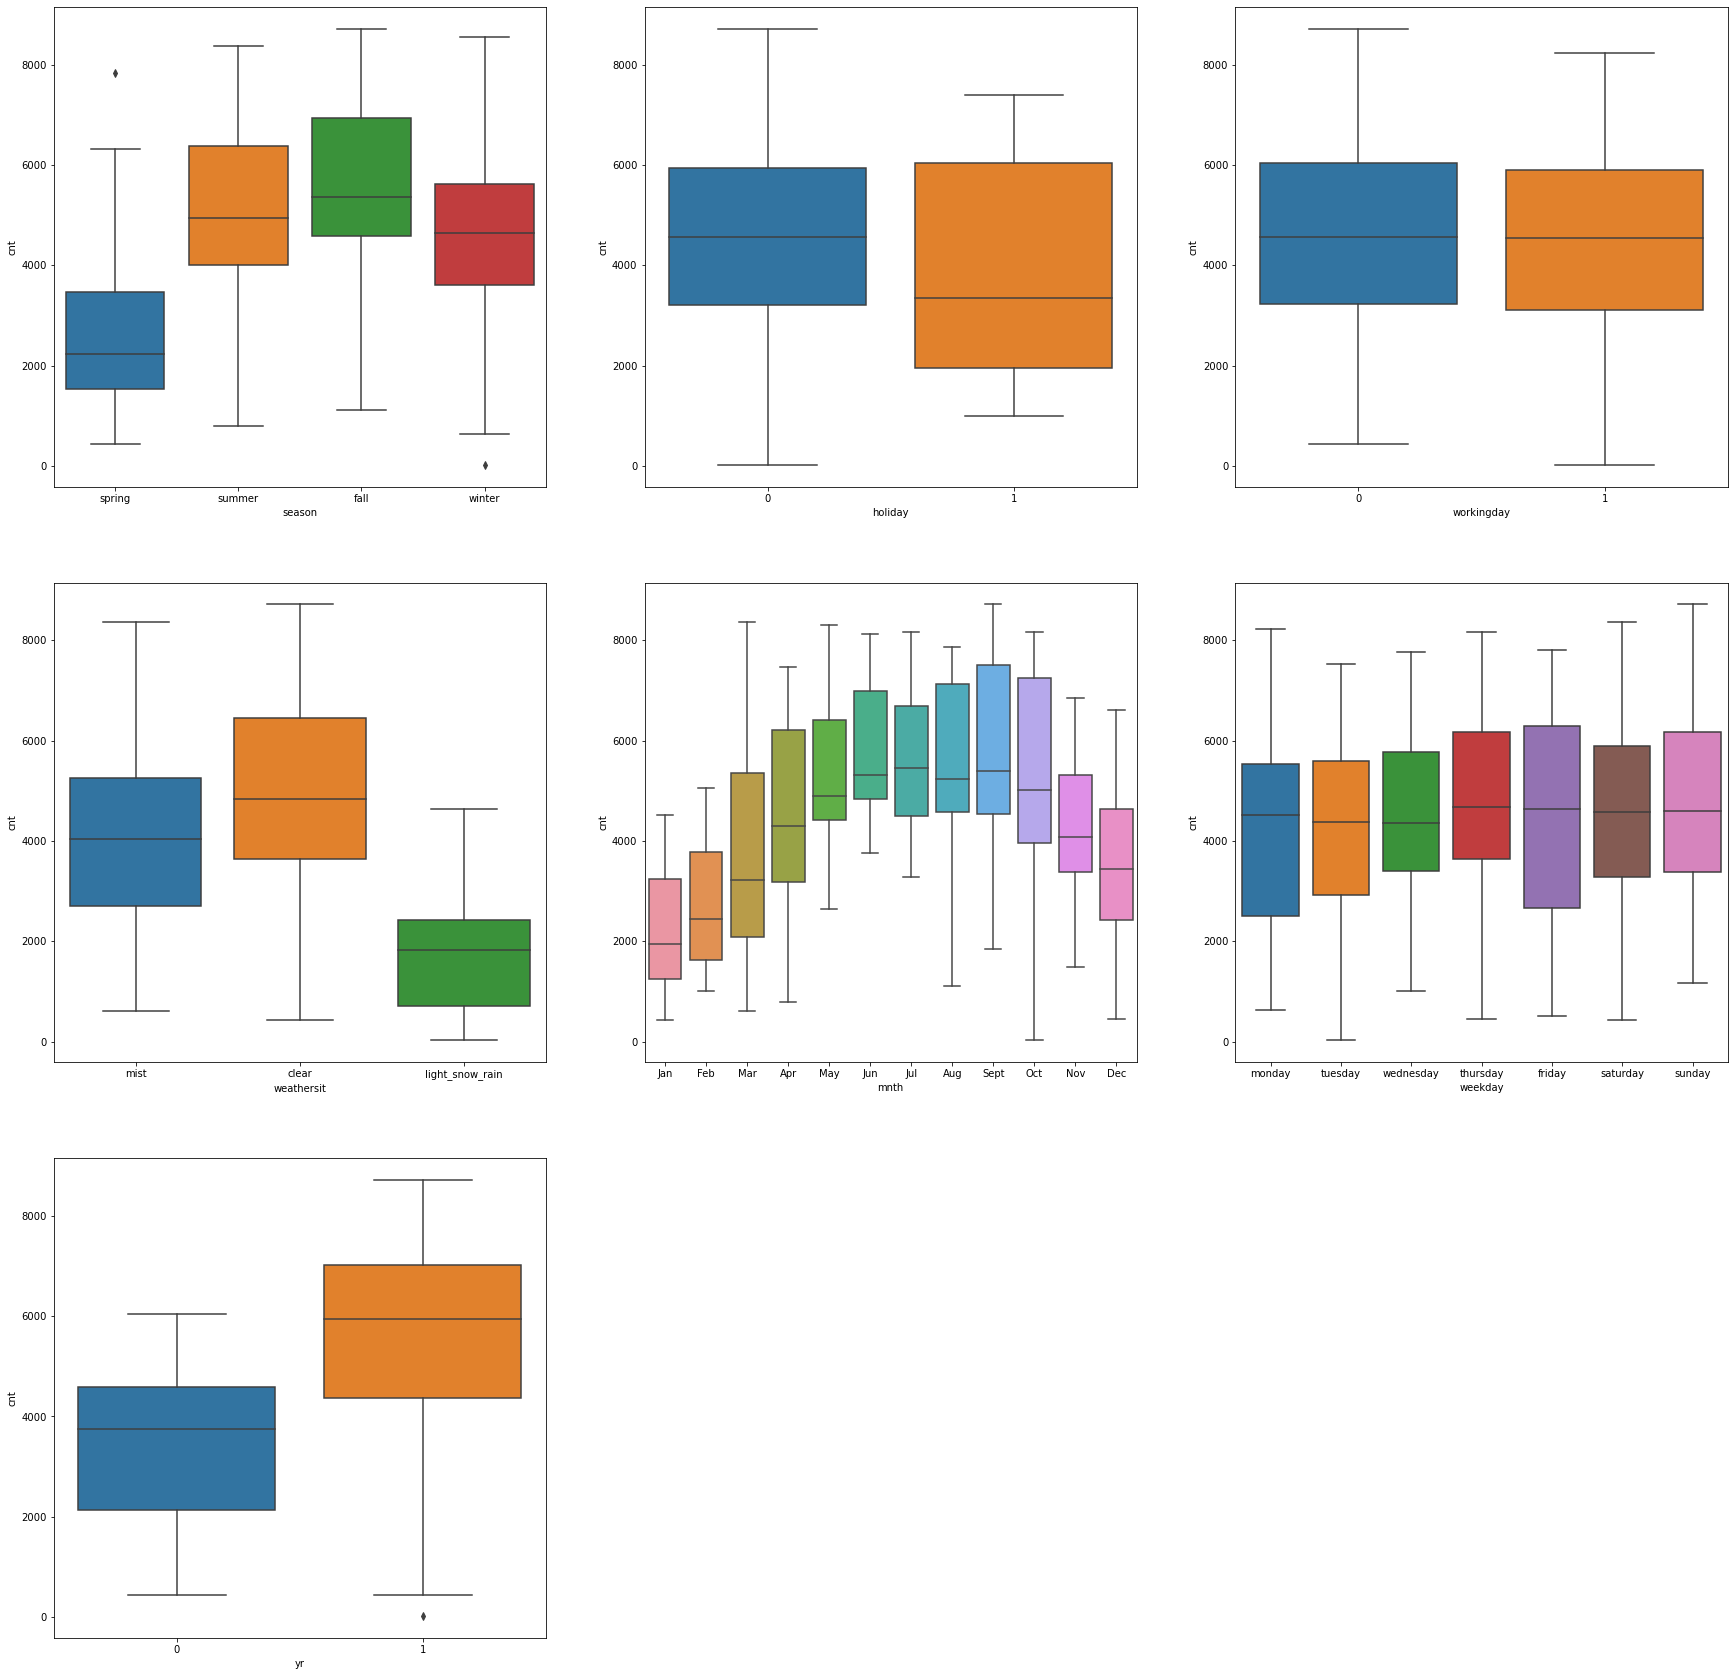

In [24]:
plt.figure(figsize=(30, 30))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

### Visualizing Numerical Variables

In [25]:
df[numerical_vars].head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600


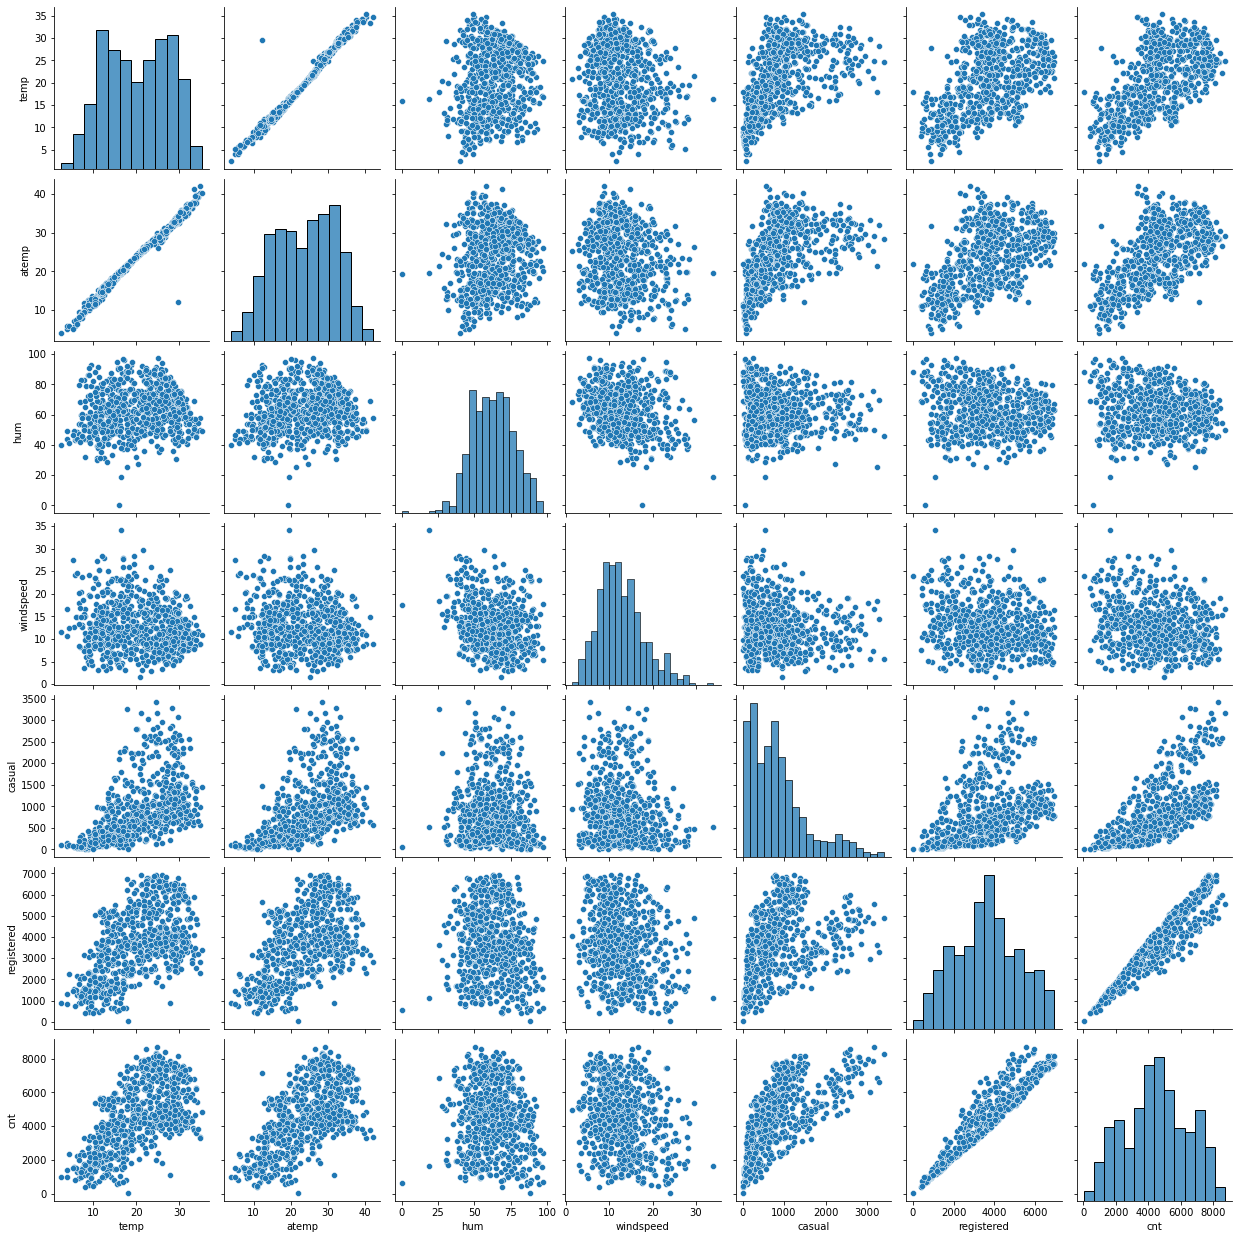

In [26]:
# Pairwise scatter plot
sns.pairplot(df[numerical_vars])
plt.show()

#### correlation matrix gives the exact values of correlation between the variables. Perhaps a heatmap is pretty useful to visualise multiple correlations in one plot.

In [27]:
# Correlation matrix
cor = df[numerical_vars].corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<AxesSubplot:>

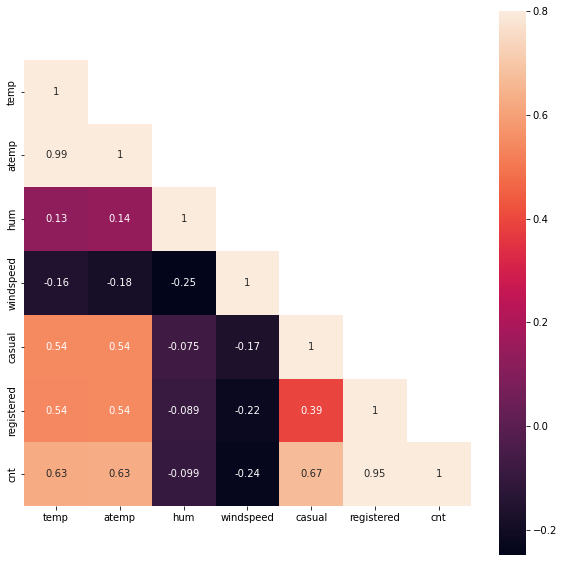

In [28]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

##### Heatmap Insights
###### Correlation of target variable with independent variables
- we can see that count(cnt) is highly,positively correlated with temp and atemp.
- Also we can observe that count(cnt) is negatively correlated with windspeed. Therefore the bike demand will be less when the windspeed is high.

###### Correlation within independent variables.
- we can see that temp is highly positively correlated with atemp, almost equals to 1. Therefore multicollinearity exists

In [29]:
#removing atemp as it is highly correlated with temp
df.drop('atemp',axis=1,inplace=True)   

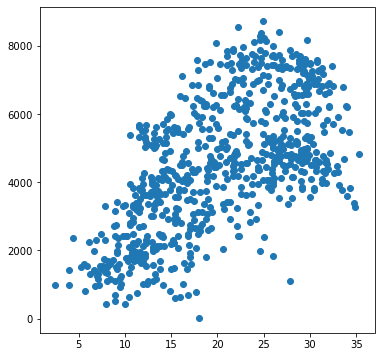

In [30]:
plt.figure(figsize=[6,6])
plt.scatter(df.temp, df.cnt)
plt.show()

### Data Preparation

#### Dummy Variabbles

In [31]:
#generating dummy values for the categorical columns and concatenating with existing dataframe
categorical_df=pd.get_dummies(df[categorical_vars],drop_first=True)
df=pd.concat([df,categorical_df], axis=1)

In [32]:
# Once concatenated, removing the redundant columns
df.drop(['season','weathersit','mnth','weekday'], axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow_rain,weathersit_mist
0,0,0,1,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,0


### Data Preparation: Splitting the Data into Training and Testing Sets

In [33]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df,train_size=0.7,test_size=0.3, random_state=100)

In [34]:
df_train.shape

(510, 31)

In [35]:
df_test.shape

(219, 31)

 ### Data Preparation: Rescaling the Features

Performing MinMax Scaling(This is just my preference)

In [36]:
from sklearn.preprocessing import MinMaxScaler


In [37]:
numerical_vars = [  'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

scaler = MinMaxScaler()
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

In [38]:
df_train[numerical_vars]

,temp,hum,windspeed,casual,registered,cnt
653,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243
576,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658
426,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255
728,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096
482,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973
...,...,...,...,...,...,...
526,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151
578,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835
53,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017
350,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586


In [39]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow_rain,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


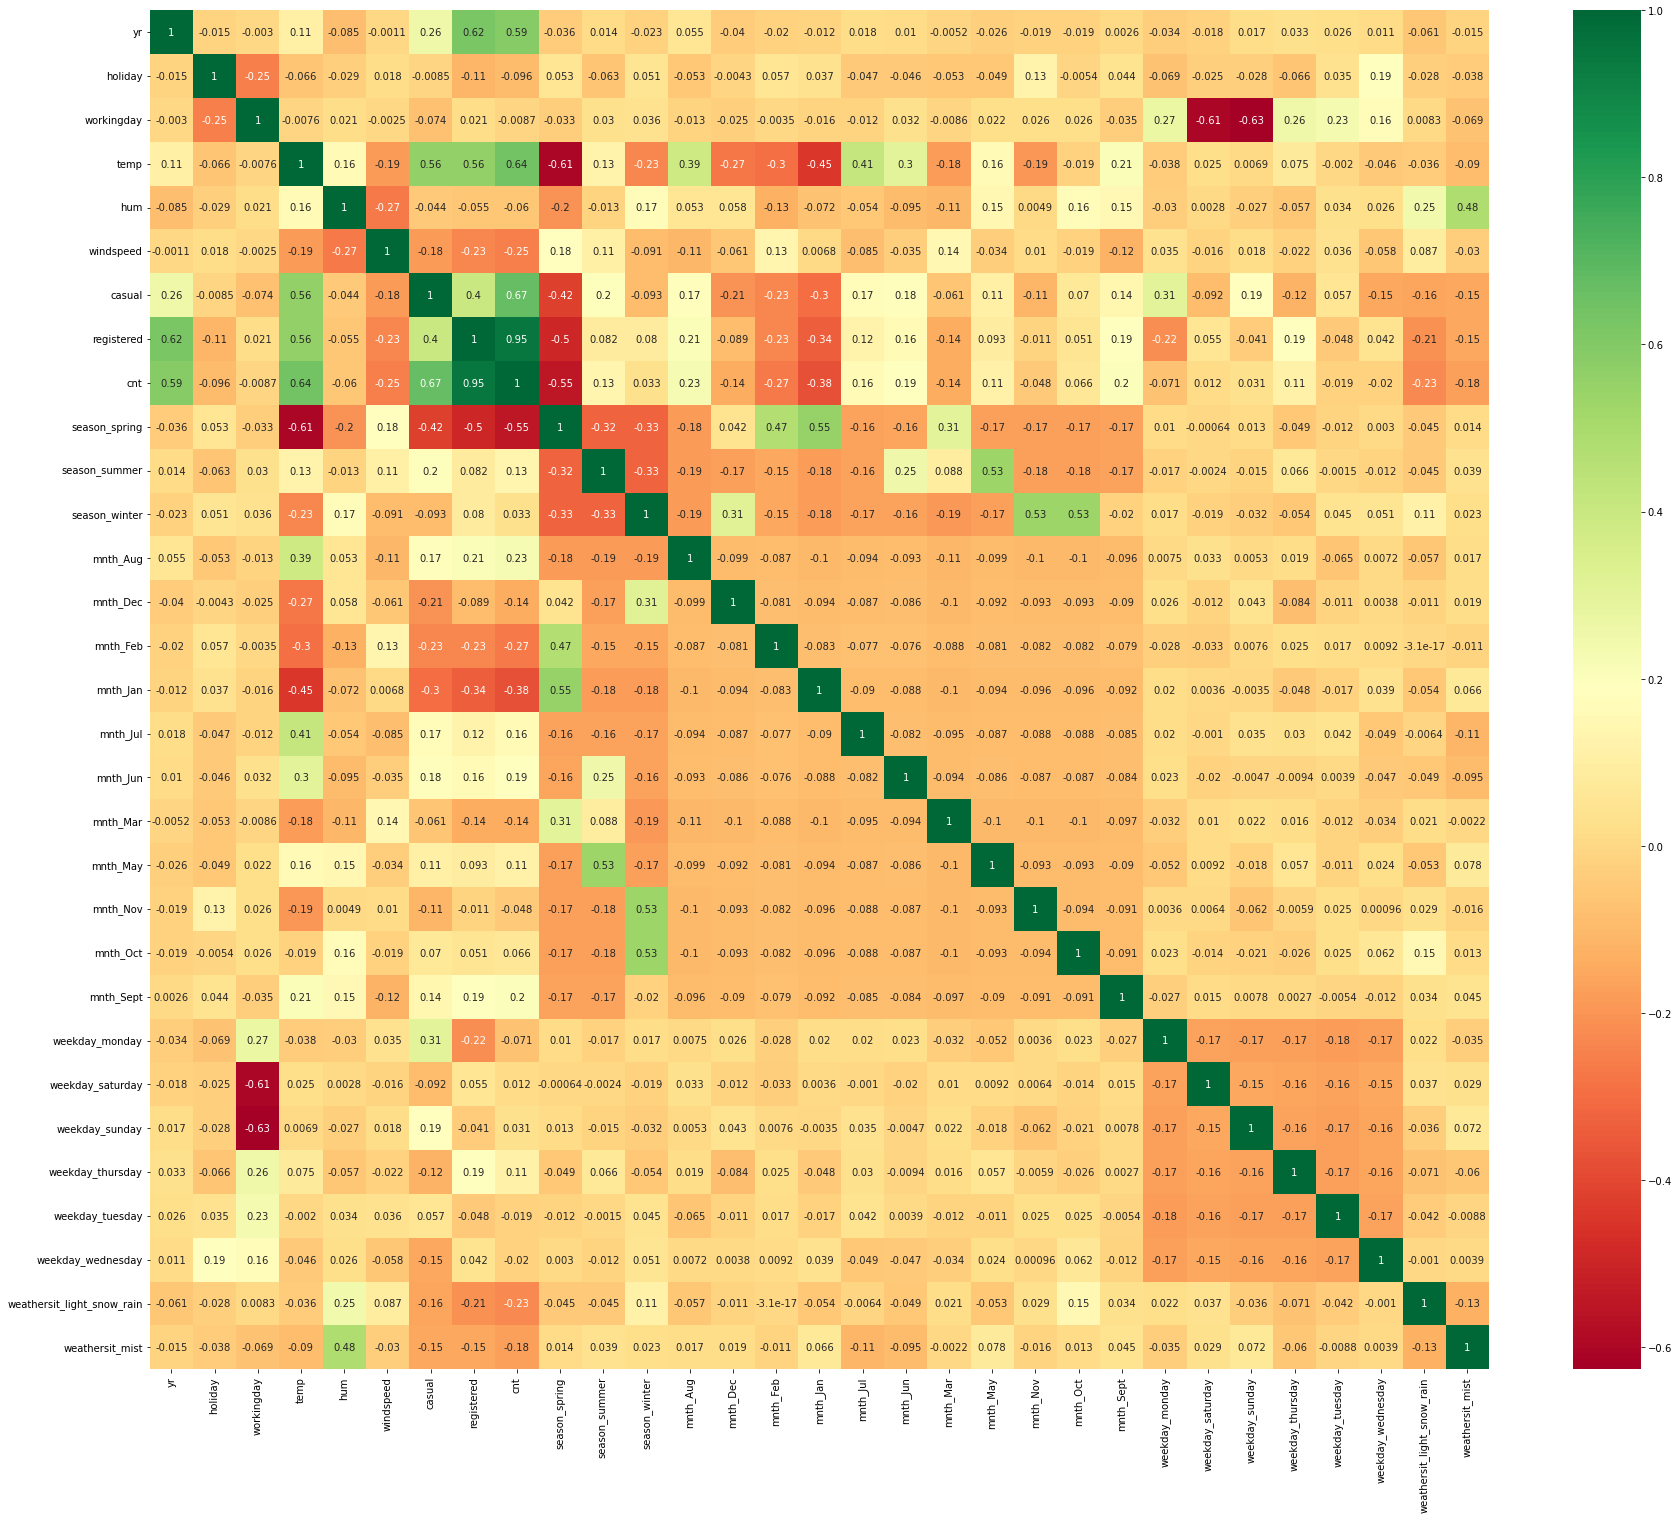

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

### Data preparation: Dividing data into X and Y

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

# Dropping 'casual' and 'registered' as together they add up to cnt
X_train.drop(['casual','registered'],axis=1,inplace=True)
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow_rain,weathersit_mist
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


### Building Model using statsmodel

#### A. Without adding constant in statsmodel

In [42]:
import statsmodels.api as sm

In [43]:
lr = sm.OLS(y_train, X_train[['temp']]).fit()

In [44]:
# Check the parameters obtained

lr.params

temp    0.908614
dtype: float64

In [45]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              4219.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):                   1.66e-248
Time:                        20:39:36   Log-Likelihood:                          139.97
No. Observations:                 510   AIC:                                     -277.9
Df Residuals:                     509   BIC:                                     -273.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

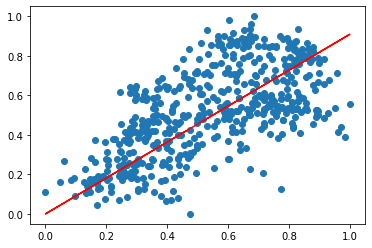

In [46]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train['temp'], y_train)
plt.plot(X_train['temp'], 0.908614*X_train['temp'], 'r')
plt.show()

#### B. Adding constant in statsmodel

In [47]:
# Add a constant
X_train_constant = sm.add_constant(X_train['temp'])

# Create a first fitted model
lr_constant = sm.OLS(y_train, X_train_constant['temp']).fit()

In [48]:
print(lr.summary())
lr.params

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              4219.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):                   1.66e-248
Time:                        20:39:36   Log-Likelihood:                          139.97
No. Observations:                 510   AIC:                                     -277.9
Df Residuals:                     509   BIC:                                     -273.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

temp    0.908614
dtype: float64

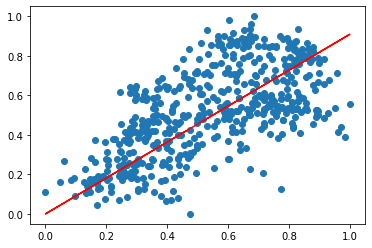

In [49]:
plt.scatter(X_train_constant['temp'], y_train)
plt.plot(X_train_constant['temp'], 0.908614*X_train_constant['temp'], 'r')
plt.show()

#### Looks like the temp variable itself explains how well the model fits a linear equation, but lets look at other independent variable which has significant correlation scores

### Adding all the variables to the model

In [50]:
# import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lr_all_vars = sm.OLS(y_train, X_train_lm).fit()

lr_all_vars.params

const                         0.394543
yr                            0.230857
holiday                      -0.135424
workingday                   -0.060524
temp                          0.445458
hum                          -0.157315
windspeed                    -0.183046
season_spring                -0.043705
season_summer                 0.042243
season_winter                 0.110897
mnth_Aug                      0.021507
mnth_Dec                     -0.045669
mnth_Feb                     -0.037279
mnth_Jan                     -0.063612
mnth_Jul                     -0.034910
mnth_Jun                      0.000975
mnth_Mar                      0.000608
mnth_May                      0.024064
mnth_Nov                     -0.041555
mnth_Oct                      0.005790
mnth_Sept                     0.086055
weekday_monday               -0.024633
weekday_saturday             -0.056319
weekday_sunday               -0.049961
weekday_thursday              0.003863
weekday_tuesday          

In [51]:
lr_all_vars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          4.33e-179
Time:                        20:39:37   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3945      0.085      4.640      0.000       0.227       0.562
yr                             0.2309      0.008     28.387      0.000       0.215       0.247
holiday                       -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday                    -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                           0.4455      0.047      9.513      0.000       0.353       0.537
hum                           -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                     -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring                 -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer                  0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter                  0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug                       0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec                      -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb                      -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan                      -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_Jul                      -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_Jun                       0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_Mar                       0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                       0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov                      -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct                       0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sept                      0.0861      0.032      2.667      0.008       0.023       0.149
weekday_monday                -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_saturday              -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_sunday                -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_thursday               0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_tuesday               -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_wednesday             -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_light_snow_rain    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_mist               -0.0594      0.011     -5.637      0.000      -0.080      -0.039
===========================================

#### This model has an Adjusted R-squared value of 84.2% which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.

### Selecting feature variables using RFE

Now, we have 28 features. It is obviously not recommended to manually eliminate these features. So let's build a model using recursive feature elimination to select features. We will first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the statsmodels library to build models using the shortlisted features (this is because SKLearn doesn't have Adjusted R-squared that statsmodels has).

In [52]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sept', True, 1),
 ('weekday_monday', False, 8),
 ('weekday_saturday', False, 4),
 ('weekday_sunday', False, 5),
 ('weekday_thursday', False, 12),
 ('weekday_tuesday', False, 7),
 ('weekday_wednesday', False, 10),
 ('weathersit_light_snow_rain', True, 1),
 ('weathersit_mist', True, 1)]

### Model Building and Evaluation

In [55]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head() 

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weathersit_light_snow_rain,weathersit_mist
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [56]:
# Fitting the model with 15 variables
linear_model_1 = sm.OLS(y_train, X_train_rfe1).fit()   
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          3.34e-189
Time:                        20:39:37   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3202      0.036      8.886      0.000       0.249       0.391
yr                             0.2303      0.008     28.511      0.000       0.214       0.246
holiday                       -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                           0.4800      0.037     12.977      0.000       0.407       0.553
hum                           -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                     -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring                 -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer                  0.0408      0.015      2.659      0.008       0.011       0.071
season_winter                  0.1034      0.018      5.763      0.000       0.068       0.139
mnth_Dec                      -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan                      -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_Jul                      -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov                      -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sept                      0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_light_snow_rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_mist               -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: The newly built model on the selected features(rfe1) doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from 84.2% to 84.1%. This is a good indication to proceed with these selected features.

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
6,season_spring,5.27
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.76
4,hum,1.93
12,mnth_Nov,1.76
10,mnth_Jan,1.68
15,weathersit_mist,1.57
9,mnth_Dec,1.49


Lets drop the constant and evaluate VIF again

In [59]:
a=X_train_rfe1.drop('const',axis=1)

In [60]:
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_mist,2.32
0,yr,2.09
11,mnth_Nov,1.83
9,mnth_Jan,1.75


In [61]:
# Running RFE with the output number of the variable equal to 7

# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(lm, 7)

# Fit with 7 features
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [62]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))


[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', False, 3),
 ('mnth_Aug', False, 17),
 ('mnth_Dec', False, 9),
 ('mnth_Feb', False, 10),
 ('mnth_Jan', False, 7),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 21),
 ('mnth_Mar', False, 22),
 ('mnth_May', False, 14),
 ('mnth_Nov', False, 8),
 ('mnth_Oct', False, 19),
 ('mnth_Sept', False, 4),
 ('weekday_monday', False, 16),
 ('weekday_saturday', False, 12),
 ('weekday_sunday', False, 13),
 ('weekday_thursday', False, 20),
 ('weekday_tuesday', False, 15),
 ('weekday_wednesday', False, 18),
 ('weathersit_light_snow_rain', True, 1),
 ('weathersit_mist', False, 5)]

In [63]:
# Subset the features selected by rfe1
col = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_light_snow_rain
653,1.0,1,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0


In [64]:
# Fitting the model with 7 variables
linear_model_2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(linear_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          2.34e-178
Time:                        20:39:38   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Reducing the predictors to half the size has just reduced the R2 from 84.5% to 81.3%. Let's go ahead and verify it with VIF for further consolidation of features

In [65]:
b=X_train_rfe2.drop('const',axis=1)

In [66]:
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,season_spring,1.80
5,mnth_Jul,1.35
6,weathersit_light_snow_rain,1.11


#### Let's remove the independent variables(one by one) which have high variance and build the model again

In [67]:
train_set_2 = X_train_rfe2.drop(['hum'], axis=1)

In [68]:
# Add a constant to the model
X_train_rfe2 = sm.add_constant(train_set_2)
 
# Fitting the model with 15 variables
linear_model_2 = sm.OLS(y_train, X_train_rfe2).fit()   
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Sun, 03 Jul 2022   Prob (F-statistic):          1.37e-168
Time:                        20:39:38   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2596      0.020     12.986      0.000       0.220       0.299
yr                             0.2360      0.009     25.713      0.000       0.218       0.254
temp                           0.4279      0.028     15.277      0.000       0.373       0.483
windspeed                     -0.1524      0.028     -5.536      0.000      -0.206      -0.098
season_spring                 -0.1413      0.014    -10.427      0.000      -0.168      -0.115
mnth_Jul                      -0.0715      0.019     -3.769      0.000      -0.109      -0.034
weathersit_light_snow_rain    -0.2413      0.027     -8.873      0.000      -0.295      -0.188
==============================================================================
Omnibus:                       54.941   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.150
Skew:                          -0.657   Prob(JB):                     1.09e-22
Kurtosis:                       4.742   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The Adjusted R2 value goes from 81.1% to 79.1% which is pretty good. The model seems to be doing a good job. Let's also quickly take a look at the VIF values.

In [69]:
c=train_set_2.drop('const',axis=1)
train_set_2

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_light_snow_rain
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [70]:
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
3,season_spring,1.49
4,mnth_Jul,1.26
5,weathersit_light_snow_rain,1.04


All the VIF values and p-values seems to be in the acceptance range now. Also the Adjusted R-squared value has dropped from 84.5% with 28 variables to just 79.1% using 6 variables. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis of the train data

In [71]:
y_train_cnt = linear_model_2.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

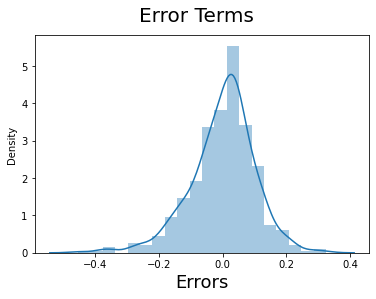

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18) 

The error terms are fairly normally distributed and model seems to be a best fit. Let's now make predictions on the test-set.

### Making Predictions

#### Applying the scaling on the test sets

In [73]:
#Consolidated feature list
X_train_rfe2

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_light_snow_rain
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


#### We would first need to scale the test set as well. So let's start with that.

In [74]:
variables = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df_test[variables] = scaler.transform(df_test[variables])

In [75]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [76]:
col2=c.columns
col2
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col2]
X_test_rfe2

,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_light_snow_rain
184,0,0.831783,0.084219,0,1,0
535,1,0.901354,0.153728,0,0,0
299,0,0.511964,0.334206,0,0,0
221,0,0.881625,0.339570,0,0,0
152,0,0.817246,0.537414,0,0,0
...,...,...,...,...,...,...
400,1,0.257562,0.287411,1,0,0
702,1,0.519232,0.283397,0,0,0
127,0,0.584649,0.069510,0,0,0
640,1,0.745598,0.052115,0,0,0


In [77]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   temp                        219 non-null    float64
 3   windspeed                   219 non-null    float64
 4   season_spring               219 non-null    uint8  
 5   mnth_Jul                    219 non-null    uint8  
 6   weathersit_light_snow_rain  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 9.2 KB


In [78]:
# Making predictions
y_test_pred = linear_model_2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

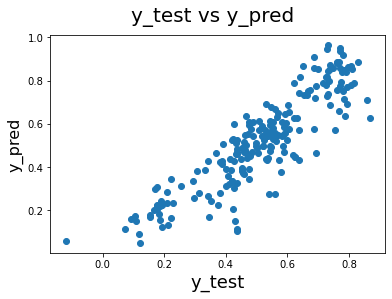

In [79]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_pred, y_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [80]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.7802124353228018

#### Summary

Thus, for the model with 6 variables, the r-squared on training and test data is about 79.3% and 78.02% respectively. The adjusted r-squared on the train set is about is about 79.1%.

The consolidated feature variables that explains the model are 
 - 1   yr                          219 non-null    int64  
 - 2   temp                        219 non-null    float64
 - 3   windspeed                   219 non-null    float64
 - 4   season_spring               219 non-null    uint8  
 - 5   mnth_Jul                    219 non-null    uint8  
 - 6   weathersit_light_snow_rain  219 non-null    uint8  